In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a50ce3a14d734ac3f1afa229325c23f4


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | narsaq
Processing Record 2 of Set 13 | ust-barguzin
Processing Record 3 of Set 13 | gusau
Processing Record 4 of Set 13 | zinder
Processing Record 5 of Set 13 | peniche
Processing Record 6 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 13 | norman wells
Processing Record 8 of Set 13 | barrow
Processing Record 9 of Set 13 | chokurdakh
Processing Record 10 of Set 13 | tanete
Processing Record 11 of Set 13 | coquimbo
Processing Record 12 of Set 13 | pundaguitan
Processing Record 13 of Set 13 | keflavik
Processing Record 14 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 13 | port elizabeth
Processing Record 16 of Set 13 | hermanus
Processing Record 17 of Set 13 | castro
Processing Record 18 of Set 13 | albany
Processing Record 19 of Set 13 | bambous virieux
Processing Record 20 of Set 13 | muros
Processing Record 21 of Set 13 | hilo
Processing Record 22 of Set 13 | kapaa
Processing Record 23 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,41.22,40,99,3.22,GL,2021-09-21 16:44:50
1,Ust-Barguzin,53.4500,108.9833,42.94,85,87,3.58,RU,2021-09-21 16:44:51
2,Gusau,12.1628,6.6614,86.83,57,49,1.74,NG,2021-09-21 16:44:51
3,Zinder,13.8072,8.9881,98.56,34,20,4.61,NE,2021-09-21 16:44:51
4,Peniche,39.3558,-9.3811,84.15,50,0,18.90,PT,2021-09-21 16:44:52
5,Norman Wells,65.2820,-126.8329,42.84,81,90,12.66,CA,2021-09-21 16:44:52
6,Barrow,71.2906,-156.7887,32.02,74,90,23.02,US,2021-09-21 16:40:42
7,Chokurdakh,70.6333,147.9167,29.98,63,100,8.61,RU,2021-09-21 16:44:53
8,Tanete,-3.9443,119.7848,71.74,93,100,3.89,ID,2021-09-21 16:44:53
9,Coquimbo,-29.9533,-71.3436,58.73,67,90,9.22,CL,2021-09-21 16:44:54


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2021-09-21 16:44:50,60.9167,-46.0500,41.22,40,99,3.22
1,Ust-Barguzin,RU,2021-09-21 16:44:51,53.4500,108.9833,42.94,85,87,3.58
2,Gusau,NG,2021-09-21 16:44:51,12.1628,6.6614,86.83,57,49,1.74
3,Zinder,NE,2021-09-21 16:44:51,13.8072,8.9881,98.56,34,20,4.61
4,Peniche,PT,2021-09-21 16:44:52,39.3558,-9.3811,84.15,50,0,18.90
5,Norman Wells,CA,2021-09-21 16:44:52,65.2820,-126.8329,42.84,81,90,12.66
6,Barrow,US,2021-09-21 16:40:42,71.2906,-156.7887,32.02,74,90,23.02
7,Chokurdakh,RU,2021-09-21 16:44:53,70.6333,147.9167,29.98,63,100,8.61
8,Tanete,ID,2021-09-21 16:44:53,-3.9443,119.7848,71.74,93,100,3.89
9,Coquimbo,CL,2021-09-21 16:44:54,-29.9533,-71.3436,58.73,67,90,9.22


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

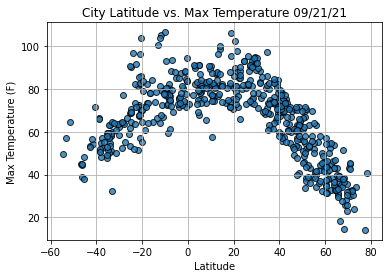

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

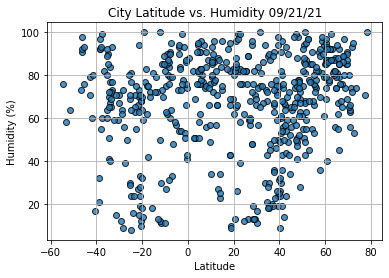

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

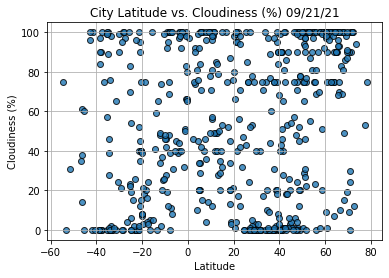

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

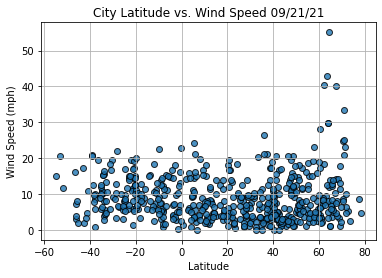

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()